In [2]:
# Confusion matrix values
TP_sentiment = 50  # True Positives for "Sentiment"
FP_sentiment = 50  # False Positives for "Sentiment"
FN_sentiment = 150 # False Negatives for "Sentiment"

TP_no_sentiment = 750  # True Positives for "No Sentiment"
FP_no_sentiment = 150  # False Positives for "No Sentiment"
FN_no_sentiment = 50   # False Negatives for "No Sentiment"

# Function to calculate precision, recall, and F1-score
def calculate_metrics(tp, fp, fn):
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return recall, precision, f1_score

# Metrics for "Sentiment"
recall_sentiment, precision_sentiment, f1_sentiment = calculate_metrics(TP_sentiment, FP_sentiment, FN_sentiment)

# Metrics for "No Sentiment"
recall_no_sentiment, precision_no_sentiment, f1_no_sentiment = calculate_metrics(TP_no_sentiment, FP_no_sentiment, FN_no_sentiment)

# Print results
print("Metrics for 'Sentiment':")
print(f"Recall: {recall_sentiment:.2f}, Precision: {precision_sentiment:.2f}, F1-Score: {f1_sentiment:.2f}")

print("\nMetrics for 'No Sentiment':")
print(f"Recall: {recall_no_sentiment:.2f}, Precision: {precision_no_sentiment:.2f}, F1-Score: {f1_no_sentiment:.2f}")


Metrics for 'Sentiment':
Recall: 0.25, Precision: 0.50, F1-Score: 0.33

Metrics for 'No Sentiment':
Recall: 0.94, Precision: 0.83, F1-Score: 0.88


###le reseaux de neurones car la moyenne et l'ecart type sont minimal

In [4]:
import numpy as np
import pandas as pd

# Given data
age_classes = np.arange(1, 14)
weights = [3.5, 3.5, 3.3, 4.4, 4.4, 4.0, 4.2, 5.1, 5.3, 5.5, 5.5, 6.6,5.7]

# Calculations
y_squared = [y**2 for y in weights]
xy = [x * y for x, y in zip(age_classes, weights)]

# Create a DataFrame
df = pd.DataFrame({
    "Classe d'âge (x_i)": age_classes,
    "Poids moyen (y_i)": weights,
    "y^2": y_squared,
    "x_i y_i": xy
})

# Display the table
print(df)

# Calculate variances and covariance
mean_x = np.mean(age_classes)
mean_y = np.mean(weights)

variance_x = np.var(age_classes, ddof=1)  # Sample variance
variance_y = np.var(weights, ddof=1)  # Sample variance
covariance_xy = np.cov(age_classes, weights, ddof=1)[0, 1]  # Covariance

print(f"Variance of x: {variance_x}")
print(f"Variance of y: {variance_y}")
print(f"Covariance of x and y: {covariance_xy}")


    Classe d'âge (x_i)  Poids moyen (y_i)    y^2  x_i y_i
0                    1                3.5  12.25      3.5
1                    2                3.5  12.25      7.0
2                    3                3.3  10.89      9.9
3                    4                4.4  19.36     17.6
4                    5                4.4  19.36     22.0
5                    6                4.0  16.00     24.0
6                    7                4.2  17.64     29.4
7                    8                5.1  26.01     40.8
8                    9                5.3  28.09     47.7
9                   10                5.5  30.25     55.0
10                  11                5.5  30.25     60.5
11                  12                6.6  43.56     79.2
12                  13                5.7  32.49     74.1
Variance of x: 15.166666666666666
Variance of y: 1.014102564102564
Covariance of x and y: 3.6416666666666666


Regression line equation: y = 3.06 + 0.26x
    Classe d'âge (x_i)  Poids moyen (y_i)        ŷ  Résidu (e_i)
0                    1                3.5  3.312821      0.187179
1                    2                3.5  3.568065     -0.068065
2                    3                3.3  3.823310     -0.523310
3                    4                4.4  4.078555      0.321445
4                    5                4.4  4.333800      0.066200
5                    6                4.2  4.589044     -0.389044
6                    7                5.1  4.844289      0.255711
7                    8                5.3  5.099534      0.200466
8                    9                5.5  5.354779      0.145221
9                   10                5.5  5.610023     -0.110023
10                  11                6.2  5.865268      0.334732
11                  12                5.7  6.120513     -0.420513


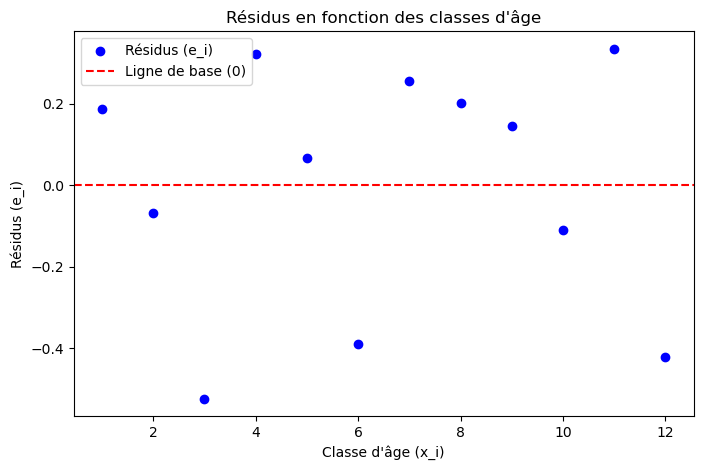

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given data
age_classes = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])  # x_i
weights = np.array([3.5, 3.5, 3.3, 4.4, 4.4, 4.2, 5.1, 5.3, 5.5, 5.5, 6.2, 5.7])  # y_i

# Step 1: Compute means of x and y
mean_x = np.mean(age_classes)
mean_y = np.mean(weights)

# Step 2: Compute slope (b) and intercept (a)
cov_xy = np.sum((age_classes - mean_x) * (weights - mean_y))  # Covariance
var_x = np.sum((age_classes - mean_x)**2)  # Variance
b = cov_xy / var_x  # Slope
a = mean_y - b * mean_x  # Intercept

# Step 3: Regression line equation
print(f"Regression line equation: y = {a:.2f} + {b:.2f}x")

# Step 4: Compute predicted values (y_hat) and residuals (e_i)
y_hat = a + b * age_classes
residuals = weights - y_hat

# Create a DataFrame for the results
df = pd.DataFrame({
    "Classe d'âge (x_i)": age_classes,
    "Poids moyen (y_i)": weights,
    "ŷ": y_hat,
    "Résidu (e_i)": residuals
})

# Display the table
print(df)

# Step 5: Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(age_classes, residuals, color='blue', label="Résidus (e_i)")
plt.axhline(0, color='red', linestyle='--', label="Ligne de base (0)")
plt.title("Résidus en fonction des classes d'âge")
plt.xlabel("Classe d'âge (x_i)")
plt.ylabel("Résidus (e_i)")
plt.legend()
plt.show()
